In [1]:
import numpy as np
from matplotlib import pyplot as plt
import imageio.v2 as imageio
import pickle
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
fn = 'mnist_digit.npy'
fn = 'mnist_digit_alt.npy'
fn = 'mnist_digit.npy'

if fn == 'mnist_digit.npy':
    save_fn = 'input_stream.npy'
if fn == 'mnist_digit_alt.npy':
    save_fn = 'input_stream_alt.npy'
    
imgs = np.load(fn)

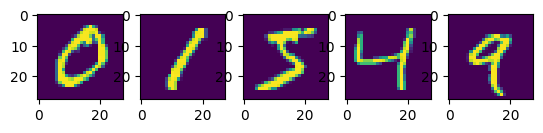

In [3]:
if fn == 'mnist_digit.npy':
    order = [1, 3, 0, 2, 4]

order = [1, 3, 0, 2, 4]
fig, ax = plt.subplots(ncols=5)
for i in range(5):
    ax[i].imshow(imgs[order[i]])


In [4]:
num_static = len(order)
num_trans = len(order) - 1

frames_transition = 45
frames_static = 20

frames = {
    'static': frames_static,
    'transition': frames_transition
}

counter = 0

input_stream = []

imgs_cast = imgs = imgs.astype(np.float32)

for phase_id in range(num_static + num_trans):
    if phase_id % 2 == 0:
        phase = 'static'
        img = phase_id // 2
    else:
        phase = 'transition'
        prev_img = (phase_id - 1) // 2
        next_img = (phase_id + 1) // 2

    for i in range(frames[phase]):
        if phase == 'transition':
            alpha = i / (frames[phase] - 1)
            frame = (1 - alpha) * imgs_cast[order[prev_img]].copy() + alpha * imgs_cast[order[next_img]].copy()
            frame += np.random.binomial(300, 0.6, imgs[0].shape) - 100
            frame[frame >= 255] = 255
            frame[frame <= 0] = 0
        else:
            frame = imgs_cast[order[img]].copy()
            frame += np.random.binomial(300, 0.6, imgs[0].shape) - 100
            frame[frame >= 255] = 255
            frame[frame <= 0] = 0
    
        input_stream.append(frame.astype(np.uint8))


input_stream = np.array(input_stream)



In [5]:
imageio.mimsave(
        'test.gif',
        input_stream,
        duration=0
    )

In [6]:
num_static = len(order)
num_trans = len(order) - 1

frames_transition = 1500
frames_static = 500

frames = {
    'static': frames_static,
    'transition': frames_transition
}

counter = 0

input_stream = []

imgs_cast = imgs = imgs.astype(np.float32)

for phase_id in range(num_static + num_trans):
    if phase_id % 2 == 0:
        phase = 'static'
        img = phase_id // 2
    else:
        phase = 'transition'
        prev_img = (phase_id - 1) // 2
        next_img = (phase_id + 1) // 2

    for i in range(frames[phase]):
        if phase == 'transition':
            alpha = i / (frames[phase] - 1)
            frame = (1 - alpha) * imgs_cast[order[prev_img]].copy() + alpha * imgs_cast[order[next_img]].copy()
            #frame += np.random.binomial(300, 0.6, imgs[0].shape) - 100
            frame[frame >= 255] = 255
            frame[frame <= 0] = 0
            #frame /= 4
        else:
            frame = imgs_cast[order[img]].copy()
            #frame += np.random.binomial(300, 0.6, imgs[0].shape) - 100
            frame[frame >= 255] = 255
            frame[frame <= 0] = 0
            
    
        input_stream.append(frame.astype(np.uint8))


input_stream = np.array(input_stream)

In [7]:
np.save(save_fn, input_stream)

In [8]:
with open('container_train_1.pkl', 'rb') as f:
    container_train_1 = pickle.load(f)

with open('container_train_2.pkl', 'rb') as f:
    container_train_2 = pickle.load(f)

with open('container_test.pkl', 'rb') as f:
    container_test = pickle.load(f)

In [9]:
cmap = plt.get_cmap("binary")

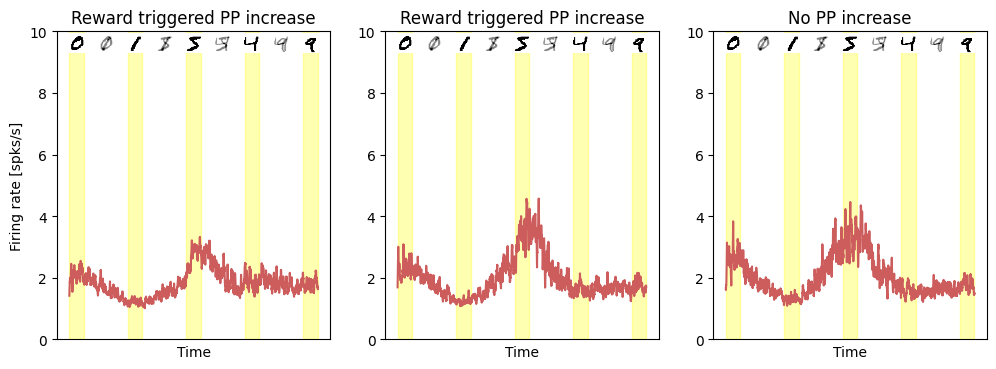

In [10]:
container = [container_train_1, container_train_2, container_test]
title = ['Reward triggered PP increase', 'Reward triggered PP increase', 'No PP increase']
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

for i in range(3):
    if i == 0:
        ax[i].set_ylabel('Firing rate [spks/s]')
    ax[i].set_xlabel('Time')
    ax[i].plot(50 * container[i]['f'].mean(axis=0), color='indianred')
    ax[i].set_ylim([0,10])
    ax[i].axvspan(0, 500, alpha=0.3, color='yellow')
    ax[i].axvspan(2000, 2500, alpha=0.3, color='yellow')
    ax[i].axvspan(4000, 4500, alpha=0.3, color='yellow')
    ax[i].axvspan(6000, 6500, alpha=0.3, color='yellow')
    ax[i].axvspan(8000, 8500, alpha=0.3, color='yellow')
    ax[i].set_xticks([])
    ax[i].set_title(title[i])

    for j in range(5):

        imagebox = OffsetImage(cmap(imgs[order[j]]), zoom=0.5)
        ab = AnnotationBbox(
            imagebox,
            (250 + j * 2000, 9.6),           # data coordinates
            frameon=False
        )
        ax[i].add_artist(ab)

    for j in range(4):
        imagebox = OffsetImage(cmap(input_stream[500 + 750 + j * 2000]), zoom=0.5)
        ab = AnnotationBbox(
            imagebox,
            (500 + + 750 + j * 2000, 9.6),           # data coordinates
            frameon=False
        )
        ax[i].add_artist(ab)

plt.savefig('landmark_learning.png')

In [39]:
with open('container_train_1_alt.pkl', 'rb') as f:
    container_train_1 = pickle.load(f)

with open('container_train_2_alt.pkl', 'rb') as f:
    container_train_2 = pickle.load(f)

with open('container_test_alt.pkl', 'rb') as f:
    container_test = pickle.load(f)

In [40]:
cmap = plt.get_cmap("binary")

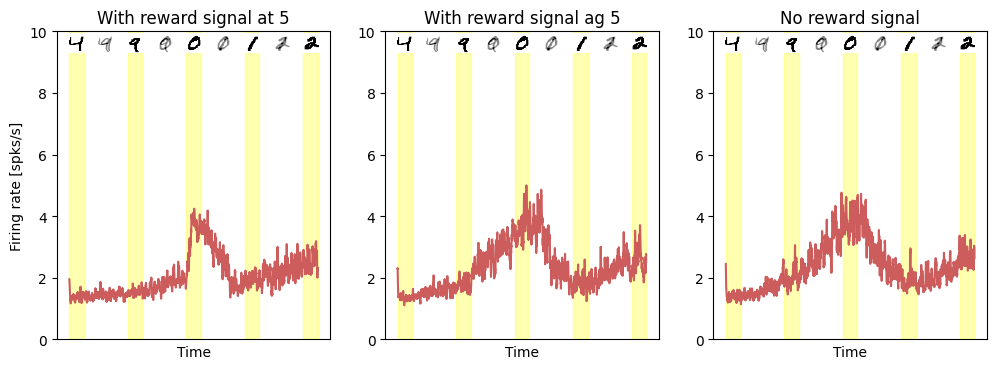

In [41]:
container = [container_train_1, container_train_2, container_test]
title = ['With reward signal at 5', 'With reward signal ag 5', 'No reward signal']
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

for i in range(3):
    if i == 0:
        ax[i].set_ylabel('Firing rate [spks/s]')
    ax[i].set_xlabel('Time')
    ax[i].plot(50 * container[i]['f'].mean(axis=0), color='indianred')
    ax[i].set_ylim([0,10])
    ax[i].axvspan(0, 500, alpha=0.3, color='yellow')
    ax[i].axvspan(2000, 2500, alpha=0.3, color='yellow')
    ax[i].axvspan(4000, 4500, alpha=0.3, color='yellow')
    ax[i].axvspan(6000, 6500, alpha=0.3, color='yellow')
    ax[i].axvspan(8000, 8500, alpha=0.3, color='yellow')
    ax[i].set_xticks([])
    ax[i].set_title(title[i])

    for j in range(5):

        imagebox = OffsetImage(cmap(imgs[order[j]]), zoom=0.5)
        ab = AnnotationBbox(
            imagebox,
            (250 + j * 2000, 9.6),           # data coordinates
            frameon=False
        )
        ax[i].add_artist(ab)

    for j in range(4):
        imagebox = OffsetImage(cmap(input_stream[500 + 750 + j * 2000]), zoom=0.5)
        ab = AnnotationBbox(
            imagebox,
            (500 + + 750 + j * 2000, 9.6),           # data coordinates
            frameon=False
        )
        ax[i].add_artist(ab)

plt.savefig('landmark_learning_alt.png')